#### For this task, you’ll take a corpus of Shakespeare sonnets, and use them to train a model with LSTM. Then, see if that model can create poetry!

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [6]:
tokenizer = Tokenizer()

# import data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /Users/tanuj/Natural-Language-Processing-in-TensorFlow/Shakespeare_dataset/sonnets.txt
    
data = open('Shakespeare_dataset/sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-11-24 16:02:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4001:81b::2010, 2a00:1450:4001:81d::2010, 2a00:1450:4001:808::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4001:81b::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: '/Users/tanuj/Natural-Language-Processing-in-TensorFlow/Shakespeare_dataset/sonnets.txt'

     0K .......... .......... .......... .......... .......... 54% 1.08M 0s
    50K .......... .......... .......... .......... .         100% 4.86M=0.05s

2020-11-24 16:02:26 (1.67 MB/s) - '/Users/tanuj/Natural-Language-Processing-in-TensorFlow/Shakespeare_dataset/sonnets.txt' saved [93578/93578]



In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [10]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.7764 - acc: 0.0207
Epoch 2/100
15462/15462 [==============================] - 37s 2ms/sample - loss: 6.4990 - acc: 0.0217
Epoch 3/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.3682 - acc: 0.0254
Epoch 4/100
15462/15462 [==============================] - 35s 2ms/sample - loss: 6.2526 - acc: 0.0298
Epoch 5/100
15462/15462 [==============================] - 36s 2ms/sample - loss: 6.1650 - acc: 0.0362
Epoch 6/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 6.0851 - acc: 0.0395
Epoch 7/100
15462/15462 [==============================] - 32s 2ms/sample - loss: 6.0101 - acc: 0.0416
Epoch 8/100
15462/15462 [==============================] - 34s 2ms/sample - loss: 5.9188 - acc: 0.0480
Epoch 9/100
15462/15462 [==============================] - 33s 2ms/sample - loss: 5.8139 - acc: 0.0530
Epoch 10/100
15462/15462 [==============================] - 35s 2ms/sampl

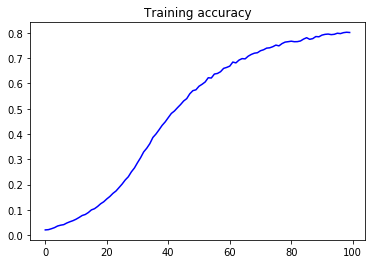

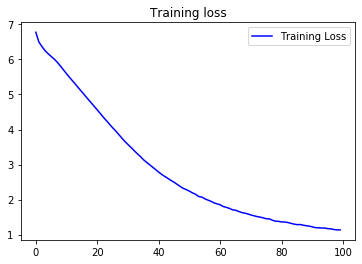

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
# give a set of words(phrase) predict next 100 words

seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope more than they live forth so bold ' so remain free so part ' dyed weeds chase thee dyed quite grow sun ' quite grow twain dearer treasure shame brow brow ' an mind staineth parts ' ' doth burn his small tomb so purging and an small pen survey end shine rare torn minds men light light bow men loss in eternity so lie to thee in thee alone was see thee bold so bold mine time ever not so cheeks ' live young me bow well must be seeming youth his part ' alive her wrong time strong
